# Solar Study Toulouse

## 1 - Preliminary work

### 1.1 - Import packages and load data

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
data_path="Données/"
# data_path="../Données/"

In [3]:
from utility_tools import regroupement_data

data_hToulouse_solar,data_dToulouse_solar=regroupement_data(data_path+'Data_Toulouse/Solar/',1980,2022,data_type="solar")
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

Toutes les données sont différentes
Toutes les données sont différentes


### 1.2 - Tendency and Seasonnality study

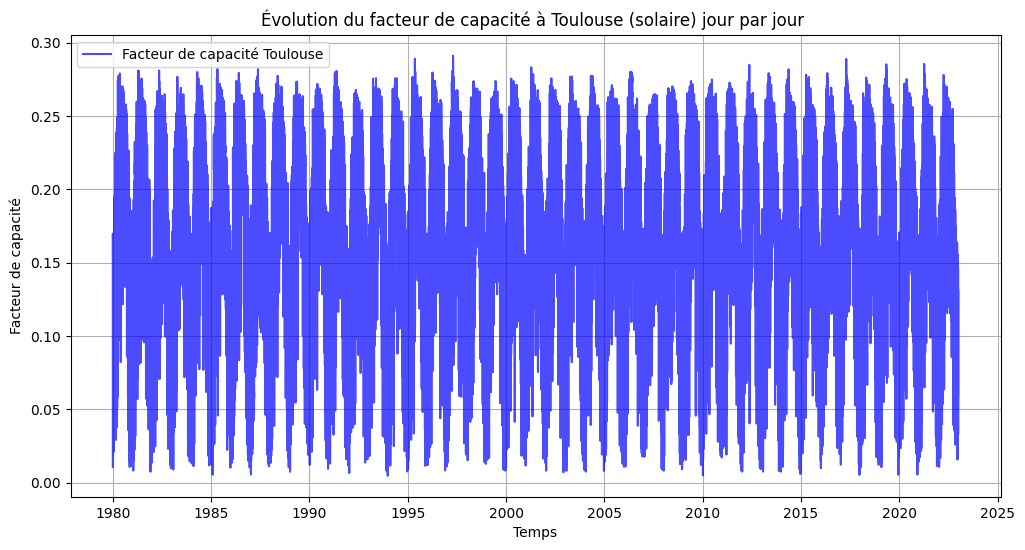

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_solar.index, data_dToulouse_solar['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (solaire) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calcul de la tendance et de la saisonnalité

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

#Ajouter étude plus approfondie tendance

tendency_Toulouse_solar,seasonnality_Toulouse_solar1=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile1_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar7=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile7_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar14=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile14_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar28=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile28_d')


Tendance à Toulouse :  0.16630004987478247


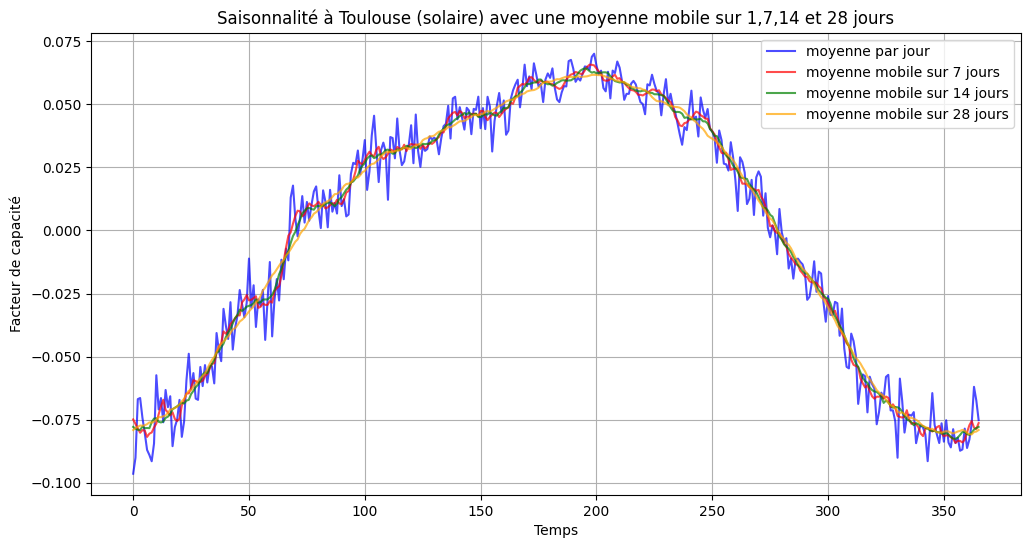

In [6]:
# Affichage de la tendance et de la saisonnalité

print("Tendance à Toulouse : ",tendency_Toulouse_solar)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),seasonnality_Toulouse_solar1, label='moyenne par jour', color='blue', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar7, label='moyenne mobile sur 7 jours', color='red', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar14, label='moyenne mobile sur 14 jours', color='green', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28, label='moyenne mobile sur 28 jours', color='orange', alpha=0.7)
plt.legend()
plt.title('Saisonnalité à Toulouse (solaire) avec une moyenne mobile sur 1,7,14 et 28 jours')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

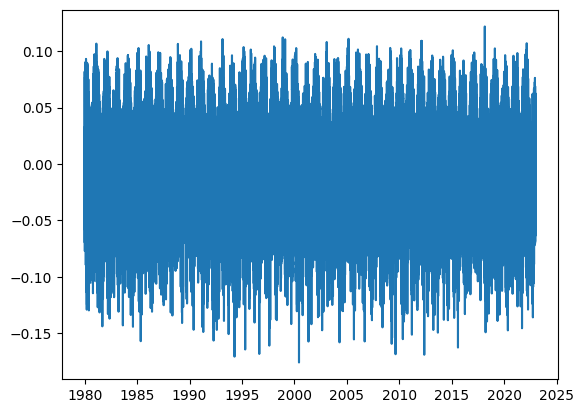

In [7]:
# Affichage des résidus

from methodes_etude_serie import Retrait_Tendance_Saisonnalite

data_stationnary = Retrait_Tendance_Saisonnalite(data_dToulouse_solar, tendency_Toulouse_solar, seasonnality_Toulouse_solar28)

plt.plot(data_stationnary['electricity'])

### 1-3 Seasonnality sinus approximation

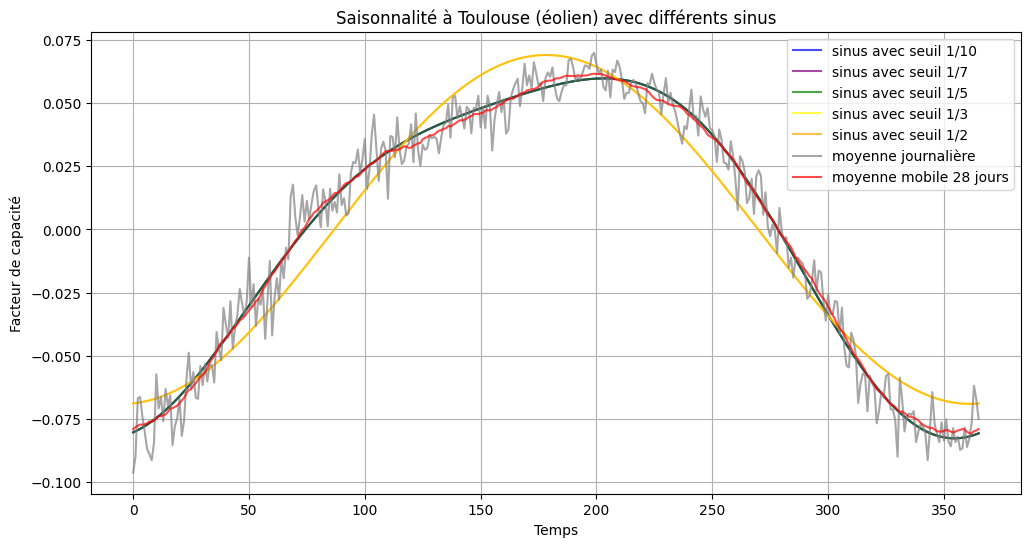

In [8]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé sans moyenne mobile avec différents seuils

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_solar,sinus1_t10_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t10')
tendency_Toulouse_solar,sinus1_t7_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t7')
tendency_Toulouse_solar,sinus1_t5_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t5')
tendency_Toulouse_solar,sinus1_t3_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t3')
tendency_Toulouse_solar,sinus1_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_solar,mean_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t10_Toulouse_solar, label='sinus avec seuil 1/10', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus1_t7_Toulouse_solar, label='sinus avec seuil 1/7', color='purple', alpha=0.7)
plt.plot(np.arange(366),sinus1_t5_Toulouse_solar, label='sinus avec seuil 1/5', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus1_t3_Toulouse_solar, label='sinus avec seuil 1/3', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus1_t2_Toulouse_solar, label='sinus avec seuil 1/2', color='orange', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_solar, label='moyenne journalière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.legend()
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

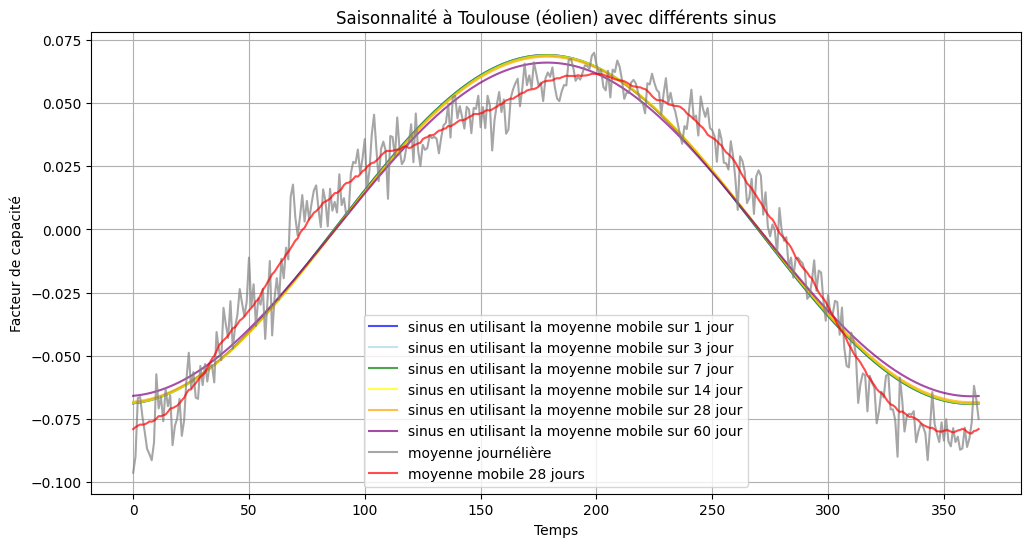

In [9]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé avec différentes moyennes mobiles avec un seuil de 0.5

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_solar,sinus1_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_solar,sinus3_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus3_t2')
tendency_Toulouse_solar,sinus7_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus7_t2')
tendency_Toulouse_solar,sinus14_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus14_t2')
tendency_Toulouse_solar,sinus28_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus28_t2')
tendency_Toulouse_solar,sinus60_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus60_t2')
tendency_Toulouse_solar,mean_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 1 jour', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus3_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 3 jour', color='lightblue', alpha=0.7)
plt.plot(np.arange(366),sinus7_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 7 jour', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus14_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 14 jour', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus28_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 28 jour', color='orange', alpha=0.7)
plt.plot(np.arange(366),sinus60_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 60 jour', color='purple', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_solar, label='moyenne journélière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

## 2- Arma and Arimax modelisation

### 2-1 Arma modelisation

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

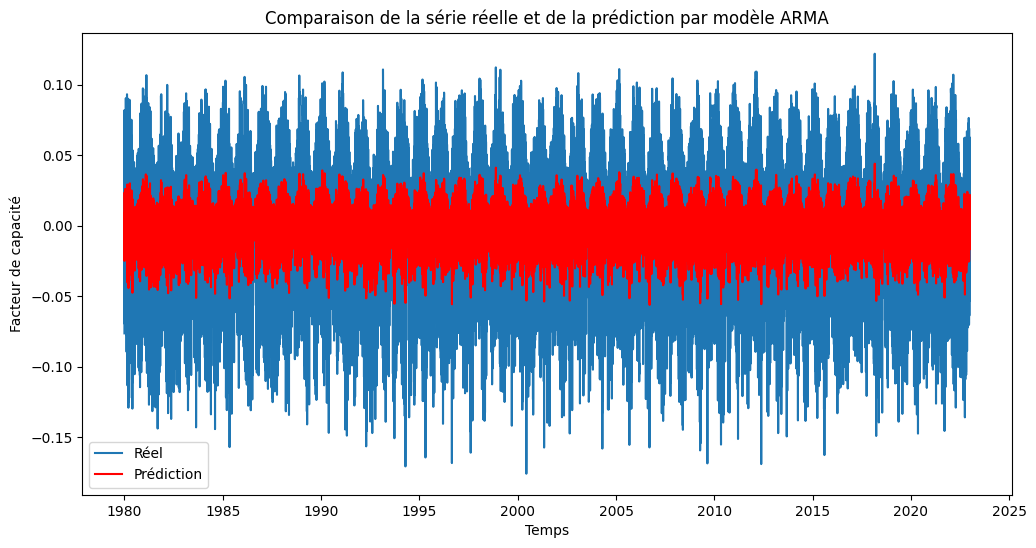

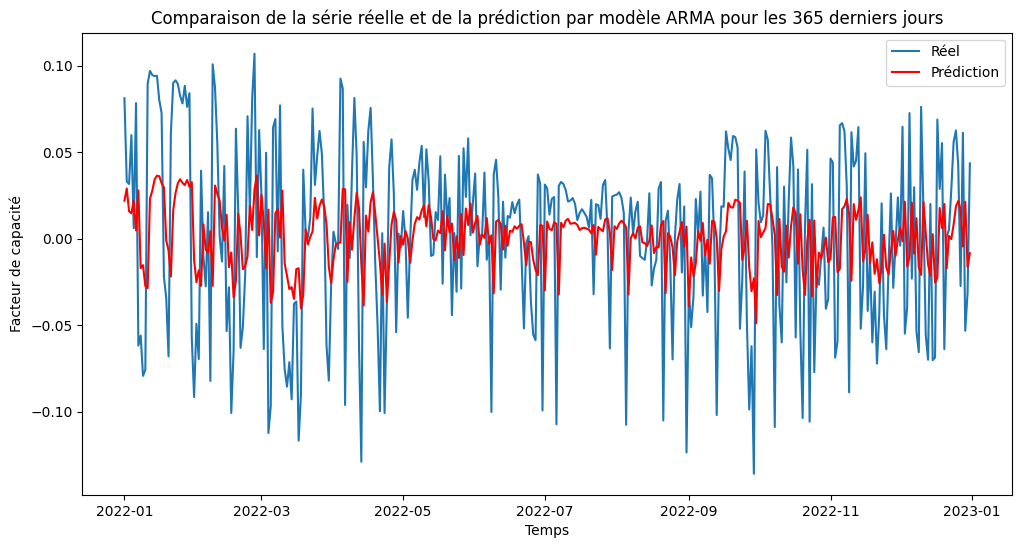

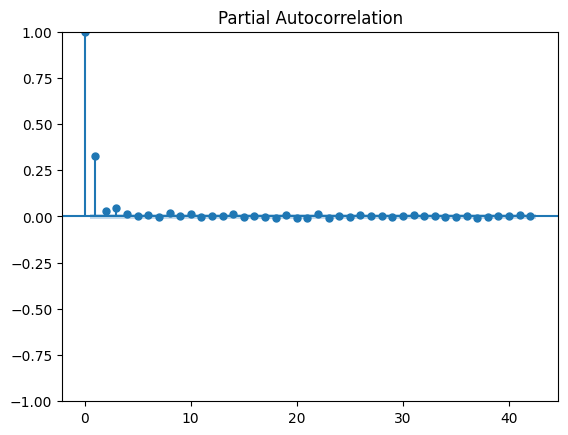

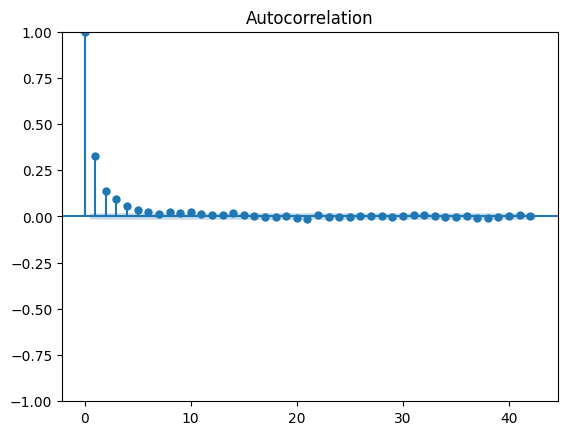

MSE: 0.0025223821268366008
MAE: 0.04048451245173153
RMSE: 0.050223322538802635
R²: 0.05391826946131695


In [10]:
from methodes_etude_serie import Arma_predict

p=3
q=3
predict=Arma_predict(data_stationnary['electricity'],p,q,graph_predict=True,graph_predict_last_year=True,graph_autocorrelation=True,error=True)


In [23]:
predict.head()

1980-01-01   -0.000020
1980-01-02   -0.025046
1980-01-03    0.023505
1980-01-04    0.022064
1980-01-05    0.022185
Freq: D, Name: predicted_mean, dtype: float64

## 3 - Etude des résidus

### 3-1 Visualisation des résidus

Les résidus sont la différence entre les valeurs réelles et les valeurs prédites par votre modèle. 

In [21]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

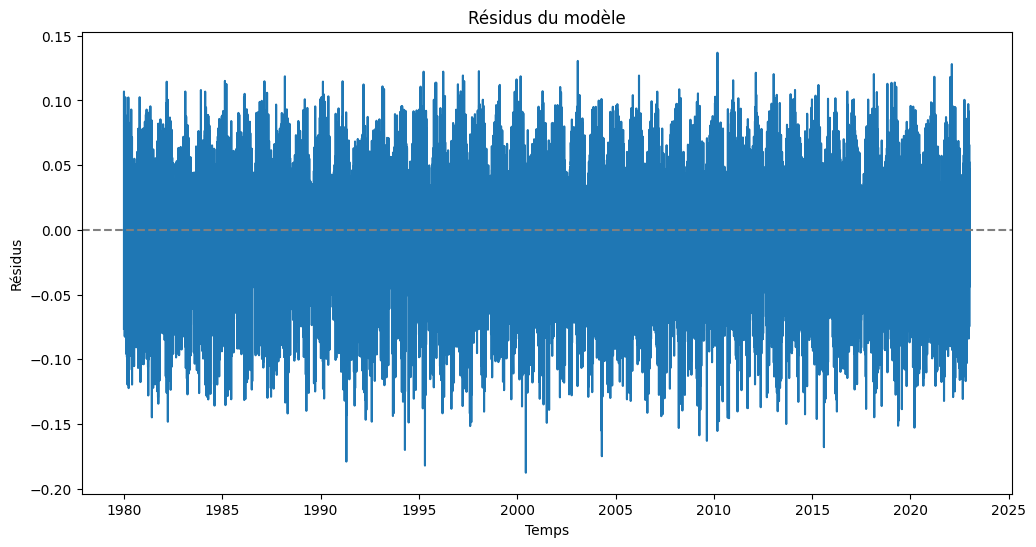

In [24]:
# Définition des résidus
residus = data_stationnary['electricity'] - predict

# Affichage des résidus 

plt.figure(figsize=(12,6))
plt.plot(residus)
plt.title('Résidus du modèle')
plt.xlabel('Temps')
plt.ylabel('Résidus')
plt.axhline(0, linestyle='--', color='gray')
plt.show()


* Centralisation autour de zéro : Les résidus semblent être centrés autour de la ligne horizontale zéro, ce qui est un bon signe. Cela indique que le modèle ne présente pas de biais systématique important, c'est-à-dire qu'il ne surestime ni ne sous-estime constamment la série temporelle.

* Absence de motif évident : Il n'y a pas de motifs ou de structures discernables dans les résidus, ce qui suggère que le modèle a capturé la plupart des informations de la série temporelle. Si des motifs étaient présents, cela pourrait indiquer que certaines informations systématiques n'ont pas été capturées par le modèle.

* Variation constante : Les fluctuations des résidus semblent avoir une variance relativement constante au fil du temps. Il n'y a pas de signes évidents d'hétéroscédasticité, c'est à dire de signes où la variance des résidus changerait à différents moments.

* Pas de points extrêmes : Il n'y a pas de résidus extrêmement élevés ou bas qui s'écartent significativement de la majorité des autres résidus. Des résidus extrêmes pourraient indiquer des valeurs aberrantes dans les données ou des moments où le modèle n'a pas bien performé.

En somme, les résidus semblent bien comportés, ce qui indique que le modèle ARMA pourrait être un ajustement approprié pour cette série temporelle. Cependant, une analyse plus poussée, comme le test de normalité et le test d'indépendance des résidus mentionnés dans ma réponse précédente, serait nécessaire pour confirmer ces observations initiales.

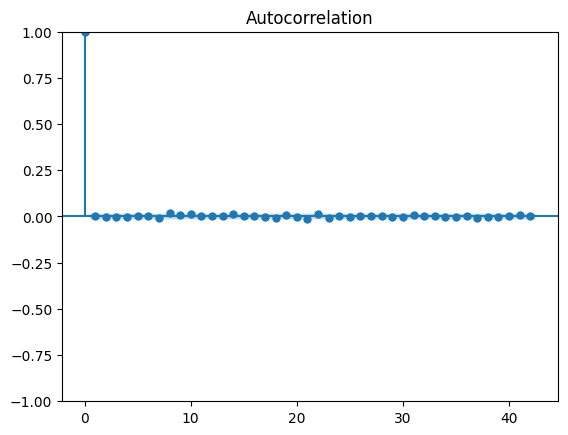

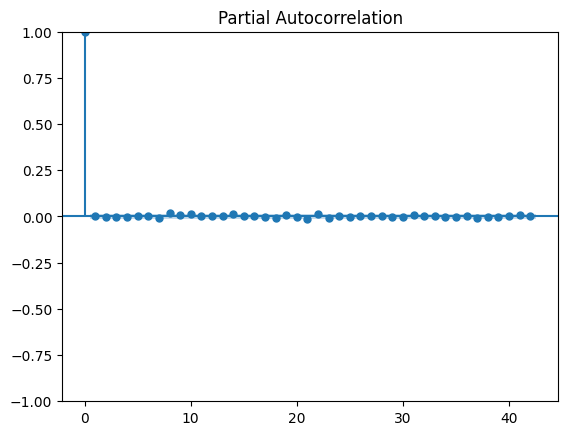

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residus)
plot_pacf(residus)
plt.show()

Lorsque l'on analyse les résidus d'un modèle, on s'attend à ce que les fonctions ACF et PACF montrent une non-significativité pour tous les lags, ce qui indiquerait que le modèle a bien capturé les informations dans les données et que les résidus sont essentiellement du bruit blanc. Cependant, la présence d'autocorrélation significative au lag 1 dans les résidus pourrait suggérer que le modèle n'a pas capturé toute la dépendance dans les données. Il se pourrait que le modèle doive être étendu, ou qu'un modèle différent doive être envisagé.

Cependant, il est également possible que ces pics soient un artefact (bruit) du processus de différenciation si le modèle ARMA a été ajusté sur des données différenciées (par exemple, un modèle ARIMA avec un terme de différenciation). Il serait utile de vérifier si ces graphiques représentent les résidus des données originales ou des données différenciées. Si c'est le dernier cas, une telle autocorrélation pourrait être attendue et ne pas indiquer un problème avec le modèle.

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(residus)
print('Statistiques de Shapiro-Wilk=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Les résidus semblent suivre une distribution normale')
else:
    print('Les résidus ne semblent pas suivre une distribution normale')


Statistiques de Shapiro-Wilk=0.979, p=0.000
Les résidus ne semblent pas suivre une distribution normale


c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


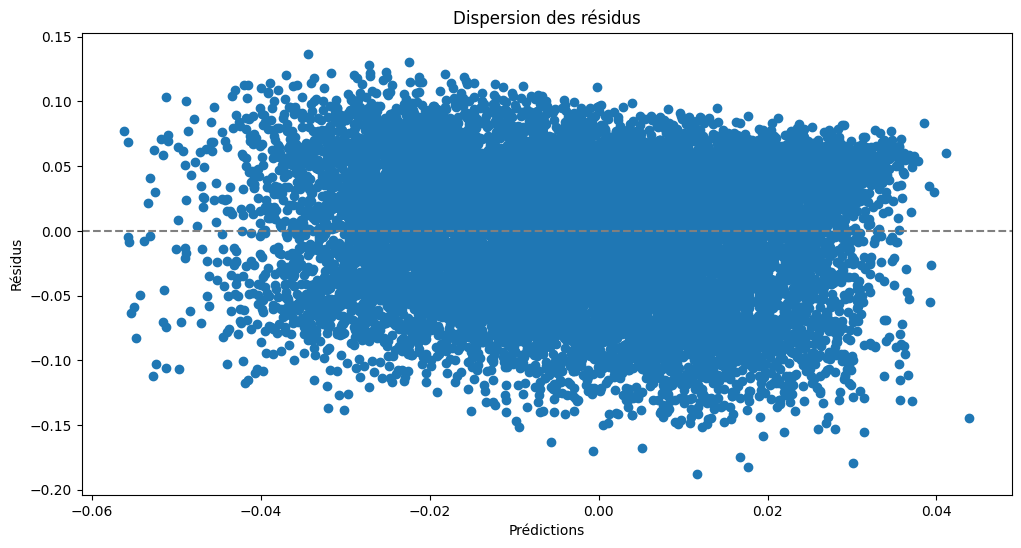

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(predict, residus)
plt.title('Dispersion des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(0, linestyle='--', color='gray')
plt.show()


* Dispersion autour de zéro : Les résidus sont dispersés autour de la ligne horizontale qui marque zéro. C'est une bonne chose car cela signifie que le modèle n'a pas de biais systématique; il ne surestime ou ne sous-estime pas systématiquement les prédictions.

* Homoscédasticité vs Hétéroscédasticité : La dispersion des points semble s'élargir à mesure que les valeurs prédites augmentent, indiquant une possible hétéroscédasticité (forme de banane). Si la variance des résidus augmente avec les valeurs prédites, cela pourrait indiquer que le modèle a des performances inégales à travers la gamme des prédictions.

* Pas de motif distinct : Il n'y a pas de motif clair ou de structure dans la dispersion des résidus par rapport aux prédictions, ce qui suggère que le modèle ne manque pas systématiquement de capturer des relations non linéaires dans les données.

* Valeurs aberrantes : Il semble y avoir quelques points potentiels d'aberration où les résidus sont très élevés ou très bas par rapport à la majorité des autres. Ces valeurs aberrantes pourraient influencer l'ajustement du modèle et pourraient nécessiter une enquête plus approfondie.

Pour améliorer le modèle, nous pouvons envisager de transformer les variables pour stabiliser la variance des résidus ou d'ajouter des variables explicatives supplémentaires pour capturer la structure non capturée dans les données. Nous pourrions également envisager d'utiliser un modèle de régression pondéré si on confirme la présence d'hétéroscédasticité.

### 3-2 Etude de l'hétéroscédasticité

Le test de Breusch-Pagan est un test statistique utilisé pour détecter la présence d'hétéroscédasticité dans les erreurs d'un modèle de régression. L'hétéroscédasticité se produit lorsque la variance des erreurs de régression n'est pas constante à travers les observations.

In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Test de Breusch-Pagan
# Création de la matrice de conception pour les variables indépendantes, en incluant une constante
X = sm.add_constant(predict)  # Ajoute une colonne de constantes

# Application du test de Breusch-Pagan sur les résidus et X
bp_test = het_breuschpagan(residus, X)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f'{name}: {value}')


Lagrange multiplier statistic: 22.23030370104575
p-value: 2.4182675632980882e-06
f-value: 22.258978299306147
f p-value: 2.402942933300832e-06


Statistique de Lagrange : La valeur de la statistique du multiplicateur de Lagrange (LM) est une mesure qui teste l'hypothèse nulle selon laquelle les erreurs sont homoscédastiques, c'est-à-dire que la variance des erreurs est la même pour toutes les observations. Une valeur élevée de la statistique LM suggère que l'hypothèse nulle est fausse, et donc que les erreurs sont probablement hétéroscédastiques. cela semble donc être le cas ici.

Valeur-p du test LM : La valeur-p correspondante est très faible (2.4182675632980882e-06), bien en dessous du seuil standard de 0,05. Cela indique que la probabilité d'obtenir une statistique LM aussi élevée ou plus élevée si l'hypothèse nulle était vraie est extrêmement faible. Par conséquent, on rejette l'hypothèse nulle d'homoscédasticité en faveur de l'alternative que les erreurs sont hétéroscédastiques.

Valeur-F : La valeur-F est une autre mesure de test pour l'hypothèse nulle, qui est distribuée selon une distribution F sous l'hypothèse nulle. Une grande valeur F indique que les variances des échantillons sont significativement différentes, ce qui soutient l'idée que les erreurs sont hétéroscédastiques.

Valeur-p du test F : La valeur-p du test F (2.402942933300832e-06) est également bien en dessous du seuil standard, ce qui mène à la même conclusion que le test LM : on rejette l'hypothèse nulle d'homoscédasticité.

En conclusion, les résultats de notre test de Breusch-Pagan suggèrent fortement la présence d'hétéroscédasticité dans les résidus de notre modèle. Cela signifie que la variance des erreurs de prédiction change avec le niveau de la variable indépendante, ce qui peut fausser les tests statistiques de significativité des coefficients et réduire l'efficacité des estimations des moindres carrés ordinaires.

Pour y remédier, nous pourrions envisager d'utiliser des erreurs standards robustes (telles que les erreurs standards de White) dans notre analyse de régression, ou de transformer les variables pour stabiliser la variance des résidus. 

### 3-3 Pour palier cela (pour la suite)

Si votre modèle ARMA ne produit pas des résidus qui semblent être normalement distribués (gaussiens), vous pouvez envisager plusieurs étapes pour tenter de corriger ce problème :

Augmenter la complexité du modèle :

Si le modèle ARMA est sous-spécifié, il se peut qu'il ne capture pas toute la structure de dépendance dans les données. Essayez d'augmenter l'ordre des termes AR (p) et/ou MA (q) si les diagnostics indiquent des autocorrélations résiduelles.
Inclusion de termes saisonniers :

Si les données ont une saisonnalité qui n'a pas été prise en compte, incluez des termes saisonniers dans votre modèle (c'est-à-dire, un modèle SARIMA).
Transformation des données :

Utilisez une transformation des données pour stabiliser la variance et rendre la distribution plus normale. Les transformations courantes incluent la transformation logarithmique, la transformation de Box-Cox ou la différenciation pour réduire la non-stationnarité.
Retirer les valeurs aberrantes :

Les valeurs aberrantes peuvent avoir un effet disproportionné sur le modèle ARMA. Identifier et retirer ou ajuster les valeurs aberrantes pourrait aider à normaliser la distribution des résidus.
Intégration d'ordre différent :

Vérifiez si un ordre d'intégration différent (le terme 'd' dans ARIMA) est nécessaire pour rendre la série temporelle stationnaire.
Réexaminer le prétraitement des données :

Assurez-vous que le prétraitement des données, comme le filtrage ou la désaisonnalisation, est effectué correctement. Parfois, les problèmes dans les étapes préliminaires peuvent affecter la distribution des résidus.
Vérifier l'adéquation du modèle :

Utilisez des tests d'hypothèses comme le test de Shapiro-Wilk pour la normalité des résidus et le test Ljung-Box pour l'autocorrélation des résidus. Ces tests peuvent confirmer s'il y a un problème avec les résidus.
Utiliser des modèles alternatifs :

Parfois, une série temporelle peut être mieux modélisée avec des approches différentes de l'ARMA. Considérez des modèles comme ARIMA, SARIMA, des modèles à changement de régime, ou même des modèles non linéaires comme ARCH/GARCH si la volatilité est une caractéristique des données.
Estimation robuste :

Si la non-normalité persiste, vous pouvez utiliser des méthodes d'estimation robustes pour obtenir des estimations des paramètres qui sont moins sensibles aux déviations de la normalité.
Simulation / Bootstrapping :

Une autre approche consiste à utiliser la méthode de bootstrap pour mieux comprendre la distribution des résidus et ajuster le modèle en conséquence.
L'approche choisie dépendra des spécificités de vos données et des résultats des diagnostics du modèle actuel. Il est souvent utile de procéder de manière itérative, en modifiant et en testant votre modèle par étapes successives pour voir quelles modifications améliorent le mieux la normalité des résidus.